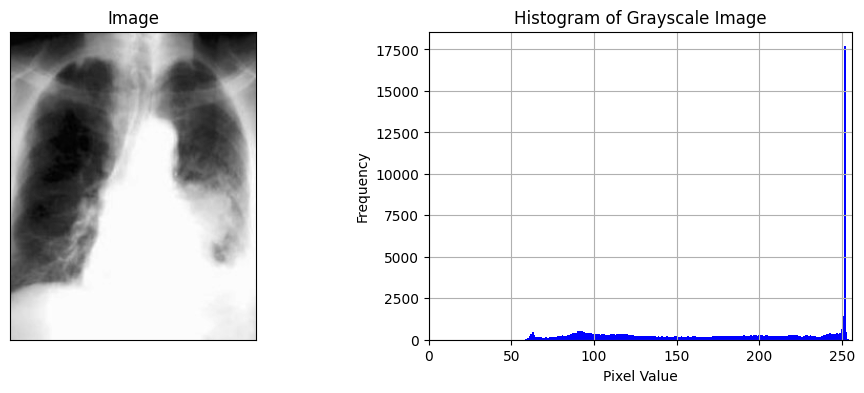

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('image3.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Could not load the image")
# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
histogram = histogram.flatten().astype(int)

# Plot the histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Image")

plt.subplot(1,2,2)
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(np.arange(256), histogram, width=1, color='blue')
plt.xlim([0, 256])
# plt.ylim([0, 3000])
plt.grid(True)

plt.show()


In [10]:
indices = np.where(histogram > 0)[0]
imin, imax = min(indices), max(indices)

cmichelson = (imax-imin)/(imax+imin)
print(cmichelson)

0.8706896551724138


In [11]:
imean = np.mean(image)
contrast_rms = np.sqrt(np.mean((image - imean) ** 2))
print(contrast_rms)

47.041261972048545


In [12]:
equalized_image = cv2.equalizeHist(image)
histeq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
histeq = histeq.flatten().astype(int)


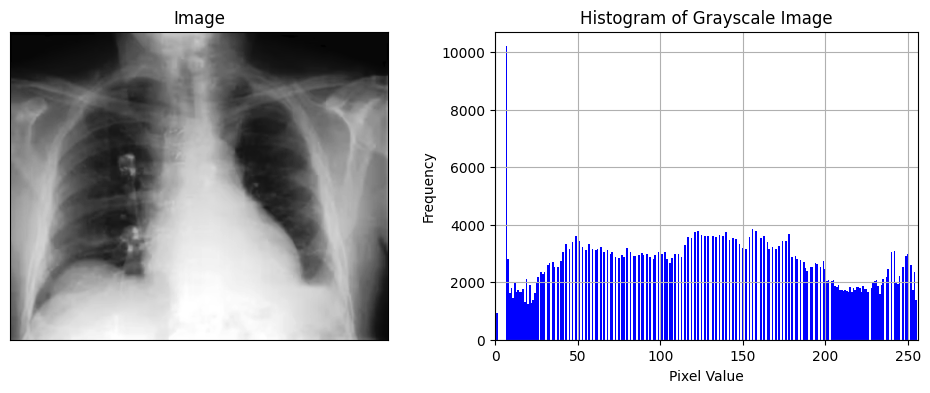

In [13]:

# Plot the histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Image")

plt.subplot(1,2,2)
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(np.arange(256), histeq, width=1, color='blue')
plt.xlim([0, 256])
# plt.ylim([0, 3000])
plt.grid(True)

plt.show()

In [14]:
indiceseq = np.where(histeq > 0)[0]
imineq, imaxeq = min(indiceseq), max(indiceseq)

cmichelsoneq = (imaxeq-imineq)/(imaxeq+imineq)
print(cmichelsoneq)

1.0


In [15]:
imeaneq = np.mean(equalized_image)
contrast_rmseq = np.sqrt(np.mean((equalized_image - imeaneq) ** 2))
print(contrast_rmseq)

73.54360710454715


In [ ]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
histogram = histogram.flatten().astype(int)
cumulative_histogram = np.cumsum(histogram)


In [39]:

max = cumulative_histogram.max()
print(max)
cumulative_normalized_hist = (cumulative_histogram/cumulative_histogram.max()*255).astype(int)


436272


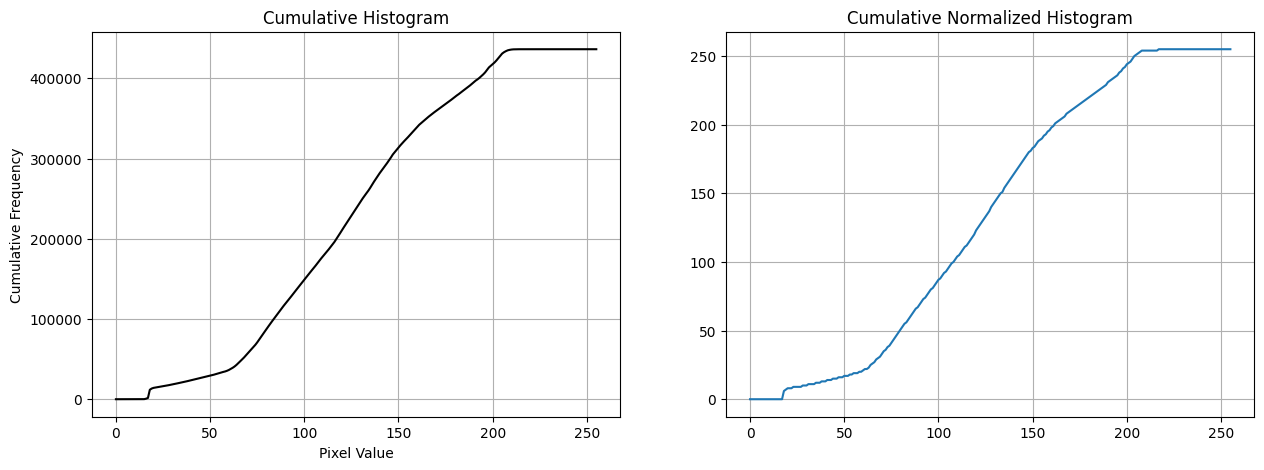

In [42]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(cumulative_histogram, color='black')
plt.title("Cumulative Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Cumulative Frequency")
plt.grid()

plt.subplot(1,2,2)
plt.title("Cumulative Normalized Histogram")
plt.plot(cumulative_normalized_hist)
plt.grid()
plt.show()

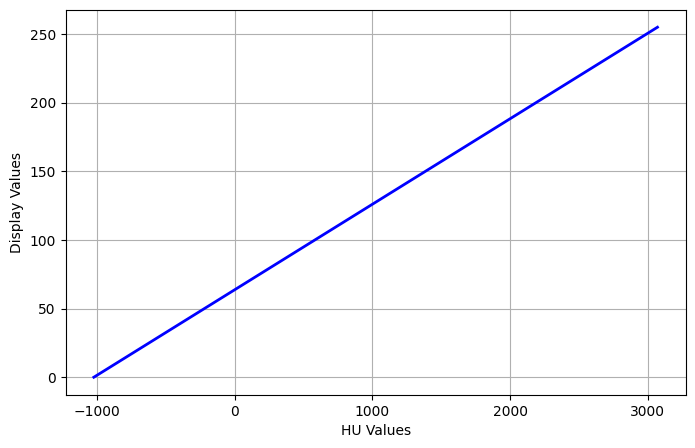

In [44]:
x = np.linspace(-1024, 3071, 1000)
y = ((x + 1024) / 4095) * 255

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2)
plt.xlabel("HU Values")
plt.ylabel("Display Values")
plt.grid(True)

# Show the plot
plt.show()

In [53]:
image_shuffled = np.copy(image)
shuffled_array = image_shuffled.flatten()
np.random.shuffle(shuffled_array)
image_shuffled = shuffled_array.reshape(image_shuffled.shape)

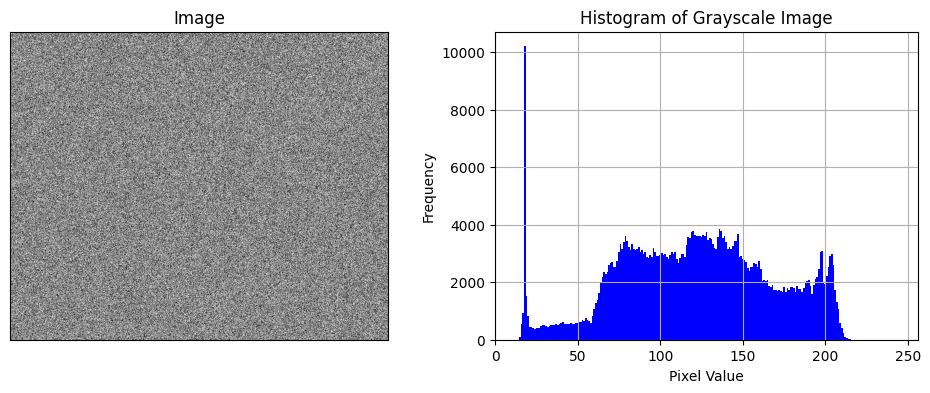

In [54]:

histogram_shuffled = cv2.calcHist([image_shuffled], [0], None, [256], [0, 256])
histogram_shuffled = histogram_shuffled.flatten().astype(int)

# Plot the histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_shuffled, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Image")

plt.subplot(1,2,2)
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(np.arange(256), histogram_shuffled, width=1, color='blue')
plt.xlim([0, 256])
# plt.ylim([0, 3000])
plt.grid(True)

plt.show()

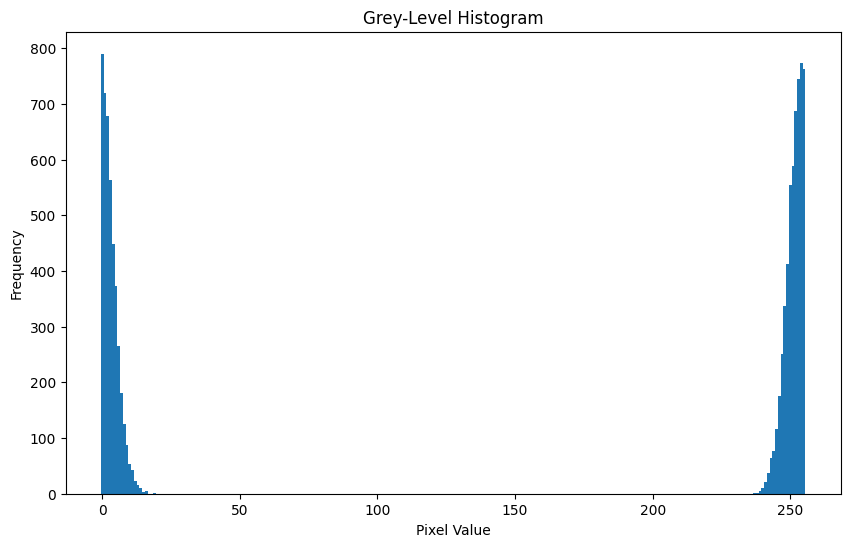

In [10]:
#histogram of almost binary image to demonstrate that highest contrast mathematically is not enough

import numpy as np
import matplotlib.pyplot as plt

# Generate the values around 0
black_pixels = np.random.normal(0, 5, 1000).astype(np.uint8)
# Clip values to be in the [0, 255] range
black_pixels = np.clip(black_pixels, 0, 255)

# Generate the values around 255
white_pixels = np.random.normal(255, 5, 9000).astype(np.uint8)
# Clip values to be in the [0, 255] range
white_pixels = np.clip(white_pixels, 0, 255)

# Combine these into a single array
image_data = np.concatenate([black_pixels, white_pixels])

# Create histogram
hist, bins = np.histogram(image_data, bins=256, range=[0,256])

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(bins[:-1], hist, width=1)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Grey-Level Histogram')
plt.show()


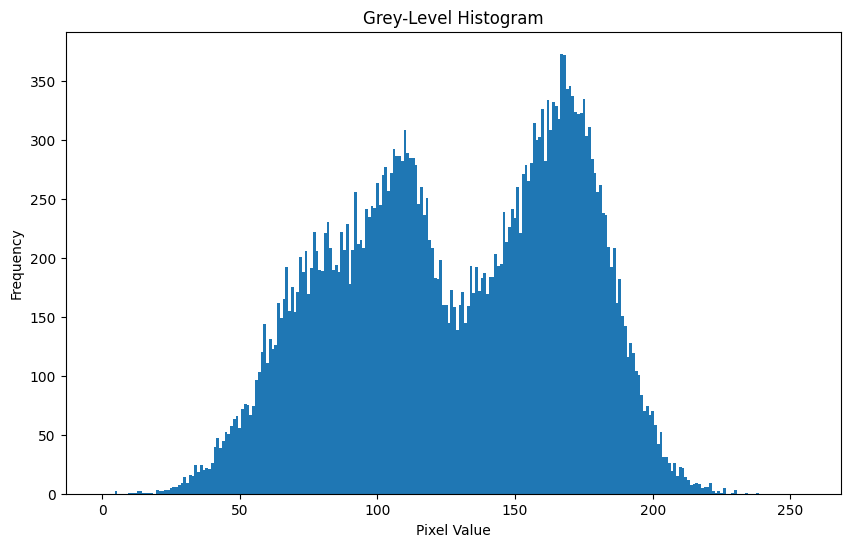

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random values in the range [70, 210]
# random_pixels = np.random.randint(70, 211, 5000).astype(np.uint8)
gaussian_pixels_1 = np.random.normal(150, 20, 10000).astype(np.uint8)
gaussian_pixels_2 = np.random.normal(110, 10, 5000).astype(np.uint8)
gaussian_pixels_3 = np.random.normal(80, 20, 10000).astype(np.uint8)
gaussian_pixels_4 = np.random.normal(180, 15, 5000).astype(np.uint8)
gaussian_pixels_5 = np.random.normal(170, 10, 3000).astype(np.uint8)


# Combine with the previously generated black and white pixels
all_pixels = np.concatenate([gaussian_pixels_1, gaussian_pixels_2, gaussian_pixels_3, gaussian_pixels_4, gaussian_pixels_5])

# Create histogram
hist, bins = np.histogram(all_pixels, bins=256, range=[0, 256])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=1)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Grey-Level Histogram')
plt.show()


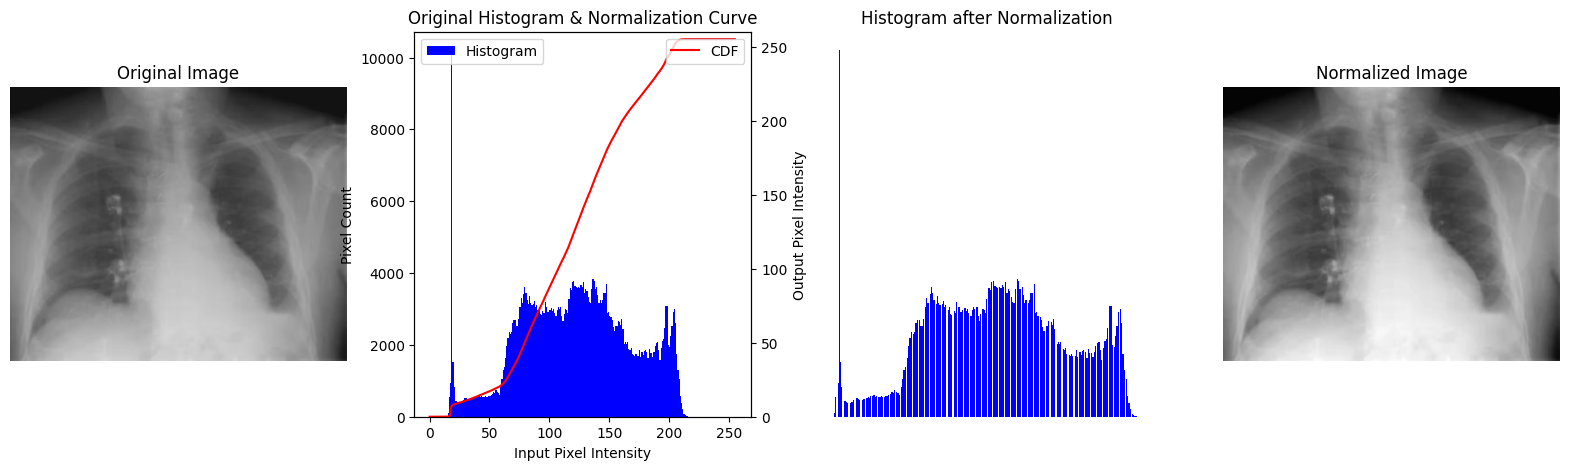

In [7]:
#this is code to generate other normalization curves
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread('rx.png', cv2.IMREAD_GRAYSCALE)


# Compute histogram of original image
hist_original, bins = np.histogram(image.ravel(), 256, [0, 256])

# Compute normalization curve
# Compute CDF
cdf = hist_original.cumsum()

# Normalize CDF to fit into the range of output pixel intensities [0, 255]
cdf_min = cdf.min()
cdf_max = cdf.max()
cdf_normalized = ((cdf - cdf_min) / (cdf_max - cdf_min)) * 255


# Apply normalization to create a new image
norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Compute histogram of the normalized image
hist_normalized, bins_normalized = np.histogram(norm_image.ravel(), 256, [0, 256])

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Show original image
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Create a twin y-axis for the second plot
ax2 = axs[1].twinx()

# Show histogram of original image with normalization curve
axs[1].hist(image.ravel(), 256, [0, 256], color='b')
axs[1].set_xlabel('Input Pixel Intensity')
axs[1].set_ylabel('Pixel Count')

# Plot the normalization curve on the second y-axis
ax2.plot(cdf_normalized, color='r')
ax2.set_ylabel('Output Pixel Intensity')
ax2.set_ylim([0, 260])

# Add legends and title
axs[1].legend(['Histogram'], loc='upper left')
ax2.legend(['CDF'], loc='upper right')
axs[1].set_title('Original Histogram & Normalization Curve')

# Show histogram obtained by using normalization curve
axs[2].hist(norm_image.ravel(), 256, [0, 256], color='b')
axs[2].set_title('Histogram after Normalization')
axs[2].axis('off')

# Show the resulting normalized image
axs[3].imshow(norm_image, cmap='gray')
axs[3].set_title('Normalized Image')
axs[3].axis('off')

plt.show()


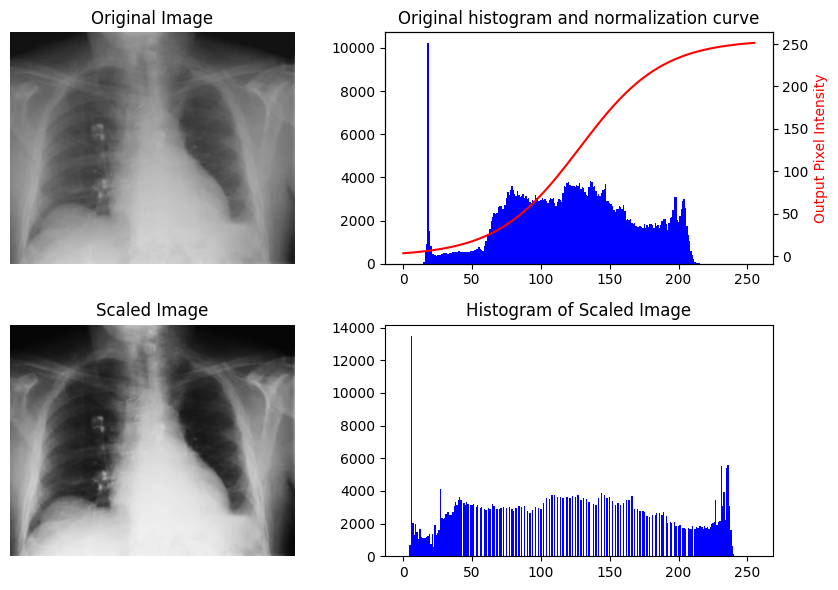

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read image
image = cv2.imread('rx.png', cv2.IMREAD_GRAYSCALE)
def sigmoid(x):
    return 255 / (1 + np.exp(-((x - 128) / 30)))  # Scaled Sigmoid function

# Assuming `image` is your original image array with dtype=np.uint8
image = image.astype(np.float32)  # Convert to float to prevent overflow/underflow

# Apply sigmoid scaling
scaled_image = sigmoid(image)
scaled_image = np.clip(scaled_image, 0, 255).astype(np.uint8)  # Clip to [0, 255] and convert to uint8

# Generate sigmoid curve
x = np.linspace(0, 255, 256)
sigmoid_curve = sigmoid(x)

# Generate histograms
hist_original, _ = np.histogram(image.flatten(), 256, [0, 256])
hist_scaled, _ = np.histogram(scaled_image.flatten(), 256, [0, 256])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Original image
axs[0, 0].imshow(image.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title('Original Image')
axs[0, 0].axis('off')

# Original histogram and sigmoid curve
axs[0, 1].bar(range(256), hist_original, color='blue', width=1)
axs1_twin = axs[0, 1].twinx()
axs1_twin.plot(sigmoid_curve, color='red')
axs1_twin.set_ylabel('Output Pixel Intensity', color='red')
axs[0,1].set_title('Original histogram and normalization curve')

# Scaled image
axs[1,0].imshow(scaled_image, cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title('Scaled Image')
axs[1,0].axis('off')

# Scaled histogram
axs[1,1].bar(range(256), hist_scaled, color='blue', width=1)
axs[1,1].set_title('Histogram of Scaled Image')


plt.tight_layout()
plt.show()


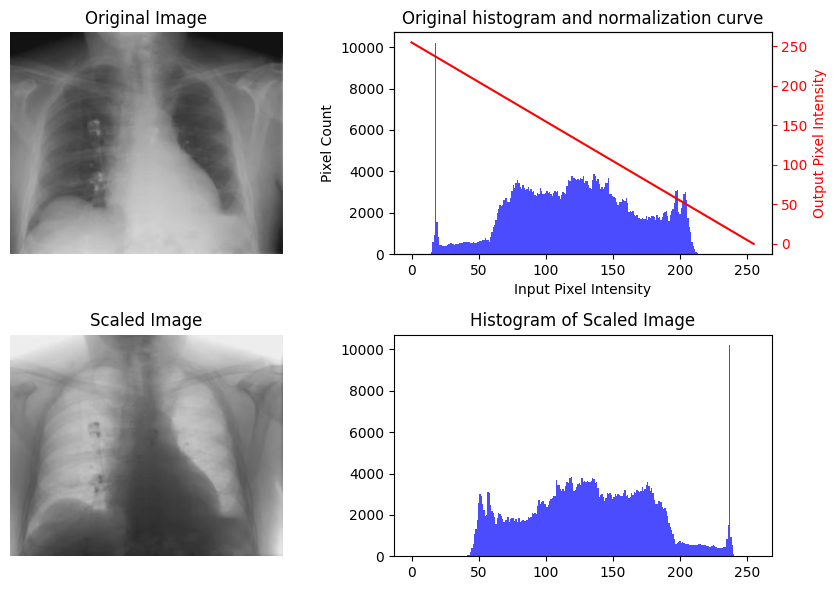

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read the image and convert to grayscale
image = cv2.imread("rx.png", cv2.IMREAD_GRAYSCALE)

# Create histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()

# Sigmoid scaling
sigmoid_curve = 255 / (1 + np.exp(-0.1 * (np.arange(256) - 128)))

# Inverse Linear scaling
inverse_linear_curve = 255 - np.linspace(0, 255, 256)

# Apply inverse linear scaling to the image
lookup_table = np.zeros(256, dtype=image.dtype)
lookup_table[:] = inverse_linear_curve[:]
image_scaled = cv2.LUT(image, lookup_table)

# Create histogram of the scaled image
hist_scaled = cv2.calcHist([image_scaled], [0], None, [256], [0, 256]).ravel()

# Create plots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Original image
axs[0,0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title('Original Image')
axs[0,0].axis("off")

# Original histogram and inverse linear curve
axs[0,1].bar(range(256), hist_original, color='blue', alpha=0.7, width=1)
axs[0,1].set_xlabel('Input Pixel Intensity')
axs[0,1].set_ylabel('Pixel Count', color='black')
axs1_twin = axs[0,1].twinx()
axs1_twin.plot(inverse_linear_curve, color='red')
axs1_twin.set_ylabel('Output Pixel Intensity', color='red')
axs1_twin.tick_params(axis='y', colors='red')
axs[0,1].set_title('Original histogram and normalization curve')

# Scaled histogram
axs[1,1].bar(range(256), hist_scaled, color='blue', alpha=0.7, width=1)
axs[1,1].set_title('Histogram of Scaled Image')

# Scaled image
axs[1,0].imshow(image_scaled, cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title('Scaled Image')
axs[1,0].axis("off")

plt.tight_layout()
plt.show()


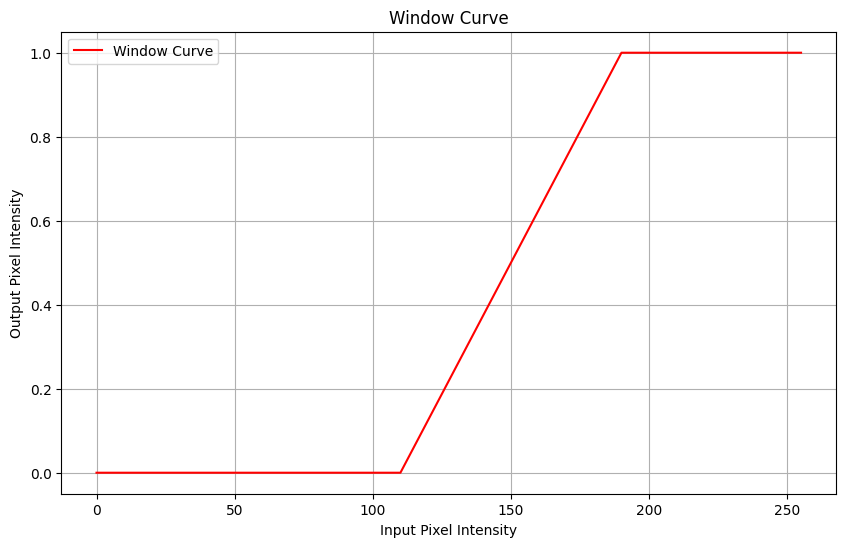

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the "window" function
def window_curve(x, min_val=110, max_val=190):
    if x < min_val:
        return 0
    elif min_val <= x <= max_val:
        return (x - min_val) / (max_val - min_val)
    else:
        return 1

# Generate x and y values for the plot
x_values = np.linspace(0, 255, 256)
y_values = [window_curve(x) for x in x_values]

# Plot the window curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Window Curve', color='red')
plt.xlabel('Input Pixel Intensity')
plt.ylabel('Output Pixel Intensity')
plt.title('Window Curve')
plt.grid(True)
plt.legend()
plt.show()
